In [2]:
# Load face data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from scipy.linalg import eigh
from scipy.io import loadmat

# Load the face data from the .mat file
face_data = loadmat("./face.mat")
Y = face_data['Y']  # Assuming Y is the key for the images
ids = face_data['id'].flatten()  # Assuming id is the key for the ground truth labels

# Reshape Y to a list of 2D arrays, one for each image
num_images = Y.shape[2]
faces = [Y[:, :, i] for i in range(num_images)]

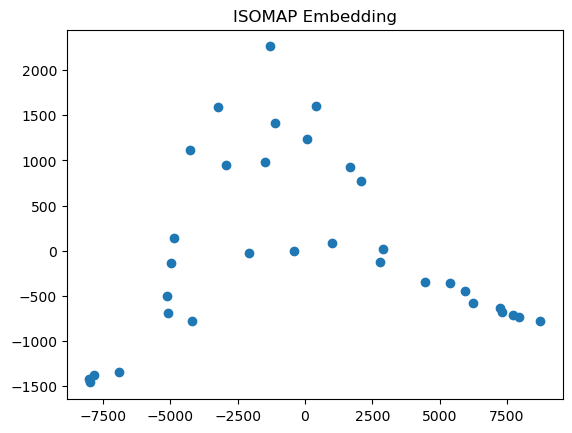

In [3]:
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt

# Flatten each 2D image into a 1D array and stack them into a 2D array
processed_faces = np.array([face.flatten() for face in faces])

# Implement ISOMAP with 5 nearest neighbors
iso = Isomap(n_neighbors=5)
Y_iso = iso.fit_transform(processed_faces)

# Visualize the results
plt.scatter(Y_iso[:, 0], Y_iso[:, 1])
plt.title('ISOMAP Embedding')
plt.show()

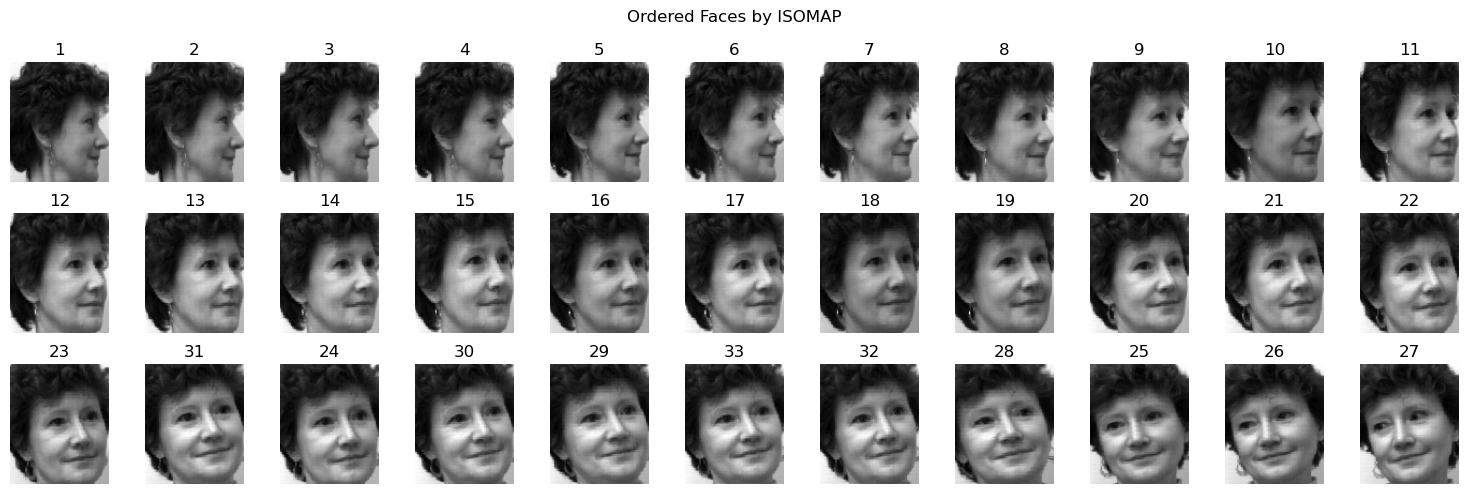

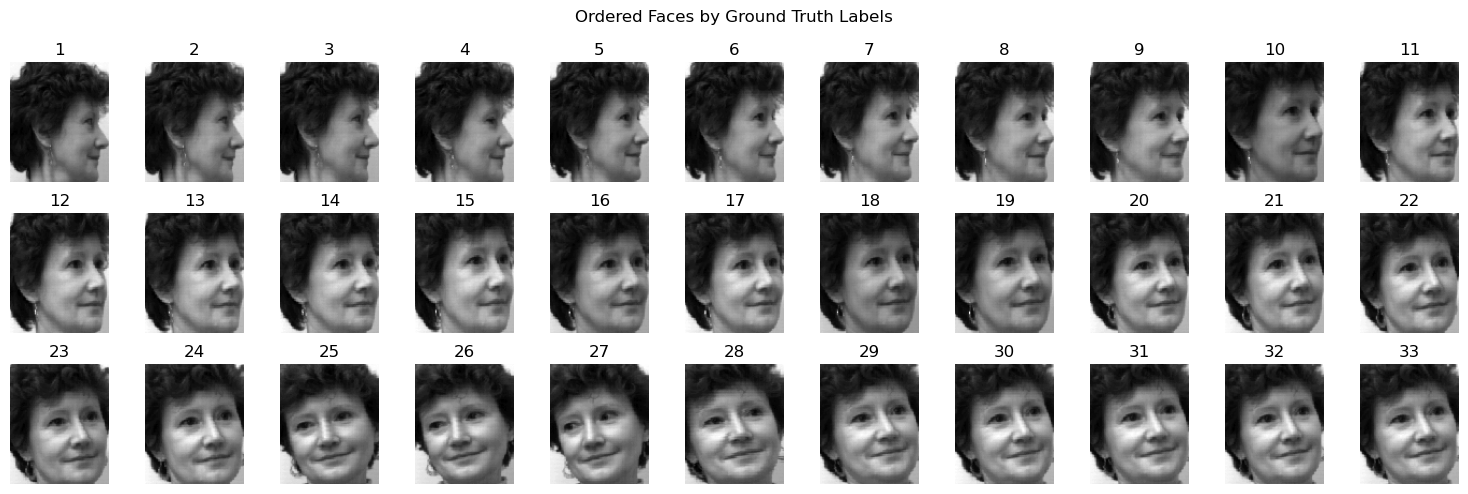

In [4]:
from sklearn.manifold import Isomap
from scipy.stats import kendalltau
import matplotlib.pyplot as plt
import numpy as np

# Flatten each 2D image into a 1D array and stack them into a 2D array
processed_faces = np.array([face.flatten() for face in faces])

# Implement ISOMAP with 5 nearest neighbors
iso = Isomap(n_neighbors=5)
Y_iso = iso.fit_transform(processed_faces)

# Sorting the images by the first ISOMAP component
sorted_indices_iso = np.argsort(Y_iso[:, 0])
sorted_faces_iso = processed_faces[sorted_indices_iso]

# Reverse the array so the last image comes first
sorted_faces_iso = sorted_faces_iso[::-1]
sorted_indices_iso = sorted_indices_iso[::-1]

# Plot the ordered faces in a 3x11 grid
fig, axes = plt.subplots(3, 11, figsize=(15, 5))  # Create a 3x11 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for i, (ax, face) in enumerate(zip(axes, sorted_faces_iso)):
    ax.imshow(face.reshape(Y.shape[0], Y.shape[1]), cmap='gray')
    ax.axis('off')
    ax.set_title(str(ids[sorted_indices_iso[i]]))  # Add order number to title

plt.suptitle('Ordered Faces by ISOMAP')  # Use suptitle for the entire figure
plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

# Order faces according to ground truth labels
ordered_indices_ground_truth = np.argsort(ids)
ordered_faces_ground_truth = processed_faces[ordered_indices_ground_truth]



# Plot the original (ground truth) order of faces in a 3x11 grid
fig, axes = plt.subplots(3, 11, figsize=(15, 5))  # Create a 3x11 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for i, (ax, face) in enumerate(zip(axes, ordered_faces_ground_truth)):
    ax.imshow(face.reshape(Y.shape[0], Y.shape[1]), cmap='gray')
    ax.axis('off')
    ax.set_title(str(ids[ordered_indices_ground_truth[i]]))  # Add order number to title

plt.suptitle('Ordered Faces by Ground Truth Labels')  # Use suptitle for the entire figure
plt.tight_layout()  # Adjust subplots to fit into the figure

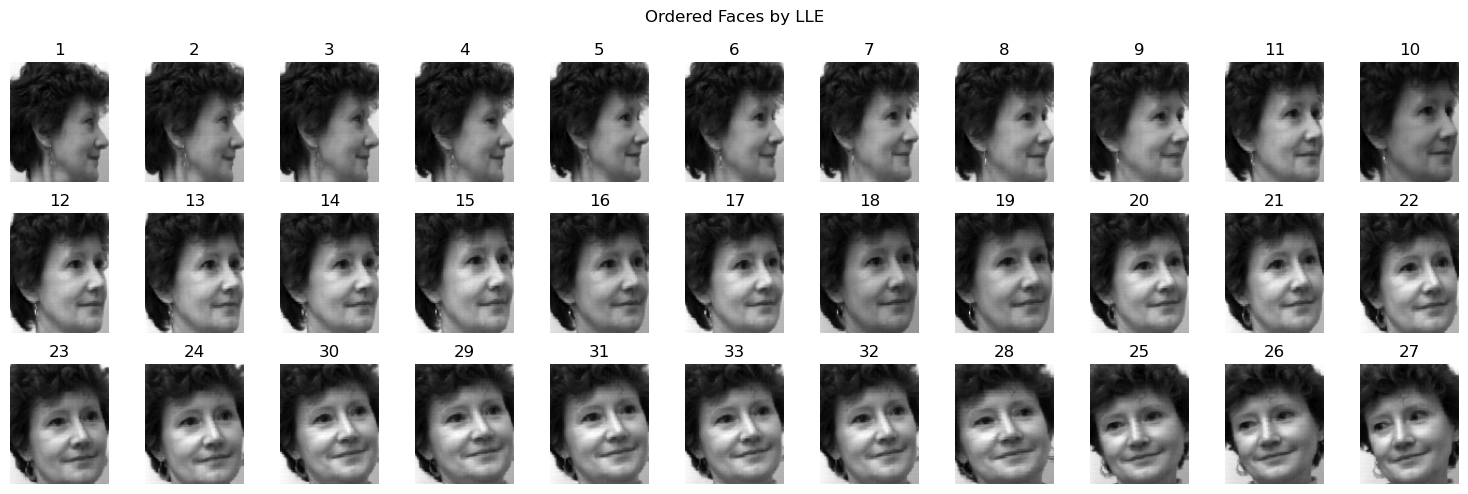

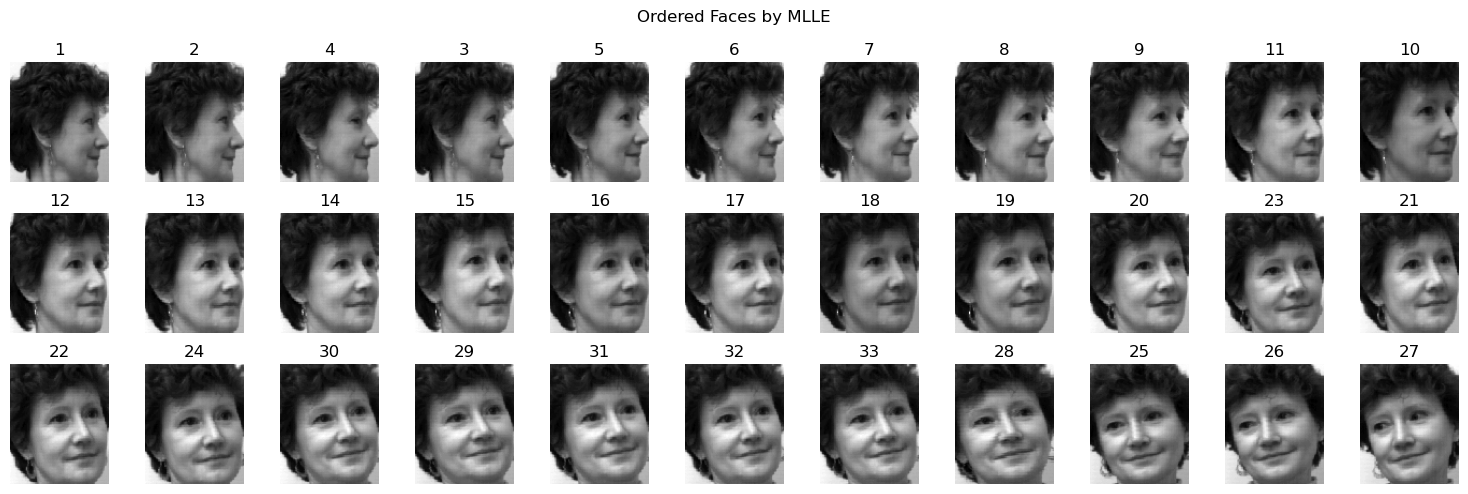

In [9]:
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt
import numpy as np

# Flatten each 2D image into a 1D array and stack them into a 2D array
processed_faces = np.array([face.flatten() for face in faces])

# Implement LLE with 5 nearest neighbors
lle = LocallyLinearEmbedding(n_neighbors=5, method='standard')
Y_lle = lle.fit_transform(processed_faces)

# Sorting the images by the first LLE component
sorted_indices_lle = np.argsort(Y_lle[:, 0])
sorted_faces_lle = processed_faces[sorted_indices_lle]

# Plot the ordered faces in a 3x11 grid
fig, axes = plt.subplots(3, 11, figsize=(15, 5))  # Create a 3x11 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for i, (ax, face) in enumerate(zip(axes, sorted_faces_lle)):
    ax.imshow(face.reshape(Y.shape[0], Y.shape[1]), cmap='gray')
    ax.axis('off')
    ax.set_title(str(ids[sorted_indices_lle[i]]))  # Add order number to title

plt.suptitle('Ordered Faces by LLE')  # Use suptitle for the entire figure
plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

# Implement MLLE with 5 nearest neighbors
mlle = LocallyLinearEmbedding(n_neighbors=5, method='modified')
Y_mlle = mlle.fit_transform(processed_faces)

# Sorting the images by the first MLLE component
sorted_indices_mlle = np.argsort(Y_mlle[:, 0])
sorted_faces_mlle = processed_faces[sorted_indices_mlle]

sorted_faces_mlle = sorted_faces_mlle[::-1]
sorted_indices_mlle = sorted_indices_mlle[::-1]

# Plot the ordered faces in a 3x11 grid
fig, axes = plt.subplots(3, 11, figsize=(15, 5))  # Create a 3x11 grid of subplots
axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate over it

for i, (ax, face) in enumerate(zip(axes, sorted_faces_mlle)):
    ax.imshow(face.reshape(Y.shape[0], Y.shape[1]), cmap='gray')
    ax.axis('off')
    ax.set_title(str(ids[sorted_indices_mlle[i]]))  # Add order number to title

plt.suptitle('Ordered Faces by MLLE')  # Use suptitle for the entire figure
plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

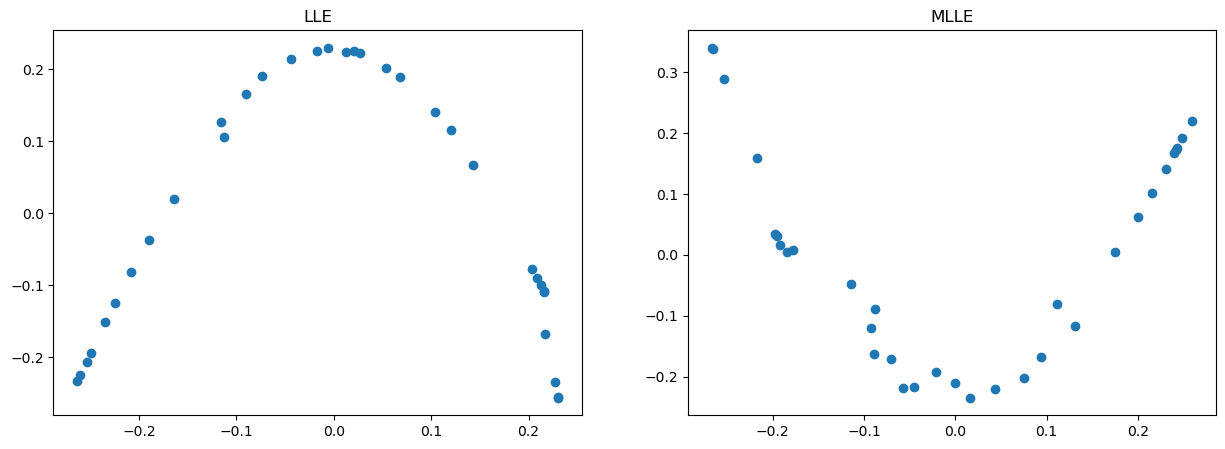

In [6]:
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt

# Implement LLE with 5 nearest neighbors
lle = LocallyLinearEmbedding(n_neighbors=5, method='standard')
Y_lle = lle.fit_transform(processed_faces)

# Implement MLLE with 5 nearest neighbors
mlle = LocallyLinearEmbedding(n_neighbors=5, method='modified')
Y_mlle = mlle.fit_transform(processed_faces)

# Visualize the results
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# LLE results
ax[0].scatter(Y_lle[:, 0], Y_lle[:, 1])
ax[0].set_title('LLE')

# MLLE results
ax[1].scatter(Y_mlle[:, 0], Y_mlle[:, 1])
ax[1].set_title('MLLE')

plt.show()  # Add this line to display the plots



In [10]:
from scipy.stats import kendalltau

# Calculate Kendall's Tau for ISOMAP
#iso_tau, iso_p = kendalltau(sorted_indices_iso, np.argsort(ids))
iso_tau, iso_p = kendalltau(ids[sorted_indices_iso], ids[np.argsort(ids)])
print('ISOMAP')
print(f"Kendall's Tau: {iso_tau:.3f}")
print(f"P-value: {iso_p:.3f}")

# Calculate Kendall's Tau for LLE
lle_tau, lle_p = kendalltau(ids[sorted_indices_lle], ids[np.argsort(ids)])
print('LLE')
print(f"Kendall's Tau: {lle_tau:.3f}")
print(f"P-value: {lle_p:.3f}")

# Calculate Kendall's Tau for MLLE
mlle_tau, mlle_p = kendalltau(ids[sorted_indices_mlle], ids[np.argsort(ids)])
print('MLLE')
print(f"Kendall's Tau: {mlle_tau:.3f}")
print(f"P-value: {mlle_p:.3f}")

ISOMAP
Kendall's Tau: 0.894
P-value: 0.000
LLE
Kendall's Tau: 0.902
P-value: 0.000
MLLE
Kendall's Tau: 0.894
P-value: 0.000
